In [45]:
# Package Imports - feel free to add what you think might be useful! 
# %pip install numpy
# %pip install matplotlib

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## Task 1: Playing with Pseudo-Randomness

### Part A: Implement and Benchmark an LCG

In [20]:
def Linear_Congruential_Generator(seed, multiplier, increment, modulus, n_steps):
    sequence = [seed]
    for i in range (n_steps):
        sequence.append((multiplier*sequence[i] + increment) % modulus)
    return sequence 

In [35]:
pass # TODO: ensure at least one parameter set satisfies the Hull-Dobell Theorem and demonstrates a full-period LCG

#A set of parameters that satisfy the given condition are as follows:
modulus = 16
increment = 1
multiplier = 5

In [ ]:
pass # TODO: run your generator for at least 10e6 steps
sequence = Linear_Congruential_Generator(10, multiplier, increment, modulus, 10**6)
sequence

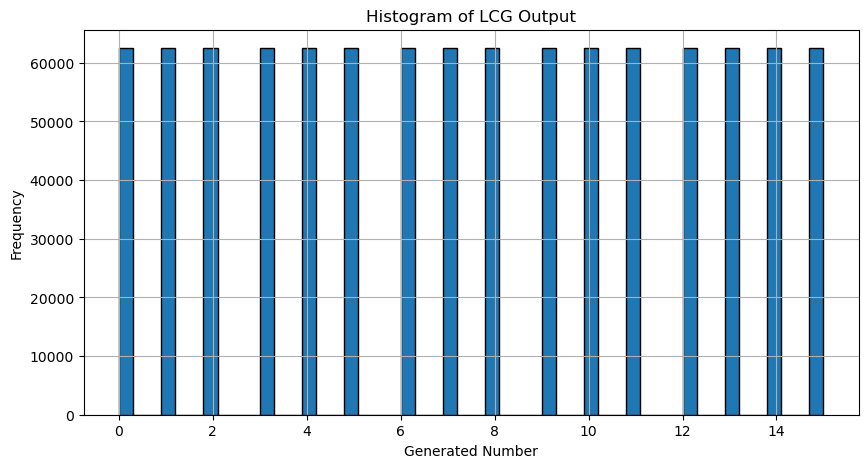

In [48]:
pass # TODO: plot a histogram of the generated numbers to visualize distribution
sequence_series = pd.Series(sequence)
plt.figure(figsize=(10, 5))
sequence_series.hist(bins=50, edgecolor='black')
plt.title("Histogram of LCG Output")
plt.xlabel("Generated Number")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [52]:
def compute_entropy(X):
    """ 
    You can pass in the random variable X in whatever form you choose.
    One way to represent a random variable is as a dictionary, 
    where each (key, value) pair represents an outcome x 
    and its probability P(X = x)

    Hint: NumPy might be helpful here!
    """
    pass # TODO: copmute Shannon Entropy or Min Entropy

# Count occurrences of each unique value
    values, counts = np.unique(X, return_counts=True)
    probs = counts / counts.sum()
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

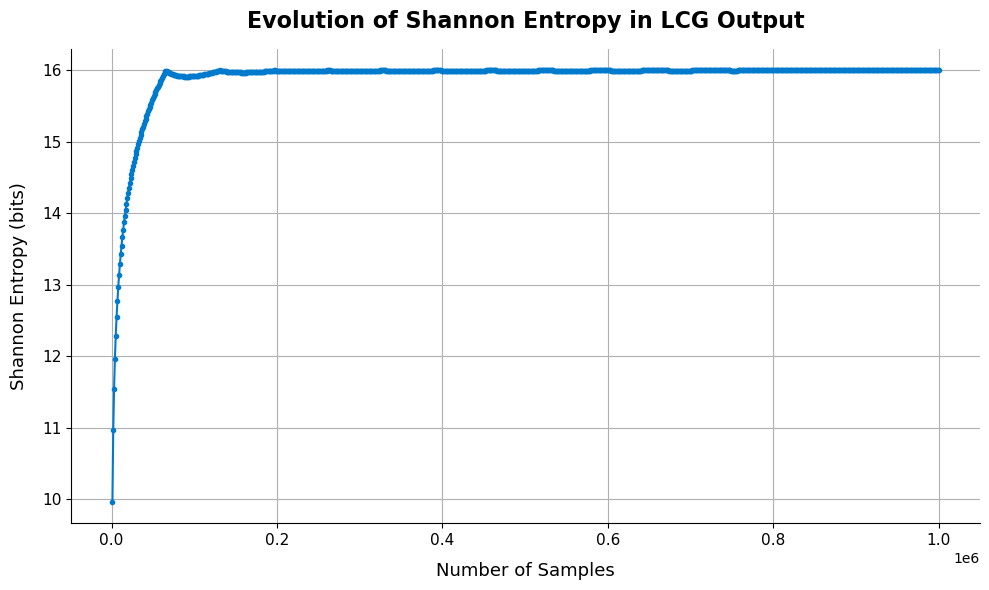

In [61]:
""" 
1. fix a short seed value for each LCG 
(no more than 2^10 possible values for the seed)

2. Over a long LCG sequence (at least 10^6 samples),
as the generator produces values, treat the sequence of outputs 
up to each step as a growing empirical distribution.

3. At regular intervals (e.g., every 1000 iterations), 
compute the Shannon Entropy or Min-Entropy 
of the current sample distribution.

Hint: We've already imported matplotlib for you, 
though any plotting package will do the trick.
"""
pass # TODO: Plot how the Shannon Entropy or Min-Entropy evolves with the number of iterations for each LCG configuration.

# Parameters for the LCG (ensure full period)

#Another example of set of values that satisfy Hull-Dobell Theorem
seed = 5423
multiplier = 17285
increment = 8671
modulus = 65536
n_steps = 10**6
interval = 1000  # Compute entropy every 1000 samples

# Generate LCG sequence
def Linear_Congruential_Generator(seed, multiplier, increment, modulus, n):
    sequence = []
    x = seed
    for _ in range(n):
        x = (multiplier * x + increment) % modulus
        sequence.append(x)
    return sequence

sequence = Linear_Congruential_Generator(seed, multiplier, increment, modulus, n_steps)

# Compute entropy at regular intervals
entropies = []
steps = []
for i in range(interval, n_steps + 1, interval):
    current_seq = sequence[:i]
    ent = float(compute_entropy(current_seq))  # Ensure entropy is a float[2]
    entropies.append(ent)
    steps.append(i)

# Create DataFrame and check types
df_entropy = pd.DataFrame({'Samples': steps, 'Entropy': entropies})
df_entropy['Samples'] = pd.to_numeric(df_entropy['Samples'])
df_entropy['Entropy'] = pd.to_numeric(df_entropy['Entropy'])

ax = df_entropy.plot(
    x='Samples', y='Entropy',
    figsize=(10, 6),
    legend=False,
    marker='o',
    markersize=3,
    linewidth=1.5,
    color='#007acc',
    grid=True
)

# Disable scientific notation and offset on y-axis
ax.ticklabel_format(axis='y', style='plain', useOffset=False)

ax.set_title('Evolution of Shannon Entropy in LCG Output', fontsize=16, pad=15, weight='bold')
ax.set_xlabel('Number of Samples', fontsize=13, labelpad=10)
ax.set_ylabel('Shannon Entropy (bits)', fontsize=13, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

### Part B: Implement and Benchmark AES-Based PRNGs

In [ ]:
# Here is a reference implementation of the AES algorithm: https://github.com/burakozpoyraz/Advanced-Encryption-Standard/tree/master

In [ ]:
# TODO: helper function to pad/truncate the seed to 16 bytes (128 bits)
def pad_seed(seed_bytes, target_len=16):
    pass  # TODO: pad or truncate the seed appropriately

# TODO: implement a simple AES-based PRNG using ECB mode
def AES_PRNG(seed, num_bytes):
    sequence = []
    pass  # TODO: implement AES-based pseudorandom generator
    return sequence

In [ ]:
# TODO: choose at least 3 different seed lengths (e.g., 8, 16, 64 bits)
seed_lengths = [1, 2, 8]  # in bytes

# TODO: generate sequences of increasing length (10^5 to 10^7) for each seed length
sequence_lengths = [10**5, 10**6, 10**7]

In [ ]:
# Example: Generate and store sequences
all_sequences = {}

for seed_len in seed_lengths:
    seed = np.random.bytes(seed_len)
    all_sequences[seed_len] = {}

    for seq_len in sequence_lengths:
        prng_output = AES_PRNG(seed, seq_len)
        all_sequences[seed_len][seq_len] = prng_output

In [ ]:
# TODO: plot entropy across chunks of the output to study randomness
def plot_entropy(sequence, window_size=1000):
    pass  # TODO: split sequence into chunks and calculate Shannon entropy

In [ ]:
# TODO: plot autocorrelation vs lag
def plot_autocorrelation(sequence, max_lag=100):
    pass  # TODO: compute autocorrelation for various lag values

In [ ]:
# TODO: apply statistical tests (e.g., Chi-squared) to compare with uniform distribution
def run_statistical_tests(sequence):
    pass  # TODO: run and print p-values for randomness tests

### (BONUS) Part C: Breaking the Illusion of Randomness

### Bonus Task:
Train a light-weight model (small-neural net or decision tree) to predict the next number in your random number sequences generated from LCG and AES. Now try implementing at least one other more robust PRNGs from the list below:
- XOR-Shift Generator
- Permuted Congruential Generator (PCG) 
- SplitMix64 

In [ ]:
# You may want to import these packages, though feel free to import anything else you need
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

import tensorflow as tf 
import keras 

import sklearn